In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
df1 = pd.read_csv('../data/drivers_clean.csv')

df1.head()

,pos,driver,nationality,car,pts,year,code
0,1,Nino Farina,ITA,Alfa Romeo,30.0,1950,FAR
1,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,1950,FAN
2,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,1950,FAG
3,4,Louis Rosier,FRA,Talbot-Lago,13.0,1950,ROS
4,5,Alberto Ascari,ITA,Ferrari,11.0,1950,ASC


In [5]:
def buscar_temporada_df1(año):
    
    return df1[df1.year == año]

In [4]:
def buscar_nombre_df1(columna, nombre):

    return df1[df1[columna].str.contains(nombre, case=False, na=False)]

In [6]:
df1_numerical = ['pos', 'pts', 'year']

df1[df1_numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
pos,1661.0,11.416616,6.442690,0.0,6.0,11.0,17.0,28.0
pts,1661.0,31.138170,60.446033,0.0,3.0,9.0,32.0,575.0
year,1661.0,1987.124624,21.849750,1950.0,1968.0,1987.0,2006.0,2024.0


In [7]:
df = pd.DataFrame
df(df1[df1.nationality == 'ESP'].driver.unique(), columns=['driver'])

,driver
0,Paco Godia
1,Alfonso de Portago
2,Luis Perez-Sala
3,Pedro de la Rosa
4,Marc Gene
5,Fernando Alonso
6,Jaime Alguersuari
7,Carlos Sainz
8,Roberto Merhi


In [8]:
df(df1.groupby('driver')['pts'].agg('sum')).sort_values(by='pts', ascending=False).head(10)

,pts
driver,
Lewis Hamilton,4681.5
Sebastian Vettel,3098.0
Max Verstappen,2755.5
Fernando Alonso,2300.0
Kimi Raikkonen,1873.0
Nico Rosberg,1594.5
Sergio Perez,1593.0
Michael Schumacher,1566.0
Daniel Ricciardo,1322.0


In [9]:
df(df1.groupby('driver')['pts'].agg('sum')).sort_values(by='pts',ascending=False).head(25)

,pts
driver,
Lewis Hamilton,4681.5
Sebastian Vettel,3098.0
Max Verstappen,2755.5
Fernando Alonso,2300.0
Kimi Raikkonen,1873.0
Nico Rosberg,1594.5
Sergio Perez,1593.0
Michael Schumacher,1566.0
Daniel Ricciardo,1322.0


In [19]:
pts_year_avg = df1.groupby('year')['pts'].agg('mean')

In [11]:
df1[df1.year == 2024].pts.mean()

42.23809523809524

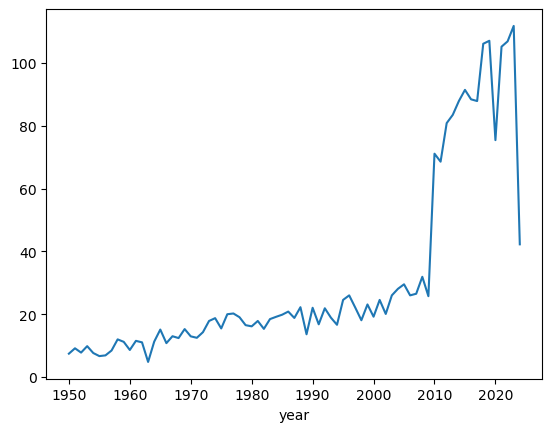

In [12]:
df1.groupby('year')['pts'].agg('mean').plot()
plt.show()

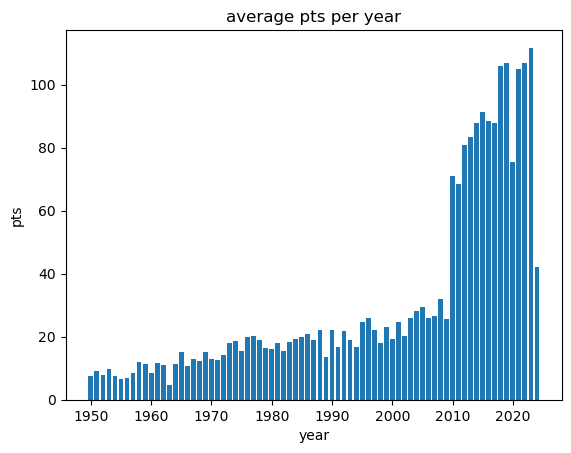

In [20]:
plt.bar(pts_year_avg.index, pts_year_avg.values)
plt.title("average pts per year")
plt.xlabel("year")
plt.ylabel("pts")
plt.show()

In [28]:
df1_old = df1[df1.year < 2010]

df(df1_old.groupby('year')['pts'].agg('mean'))

,pts
year,
1950,7.454545
1951,9.157895
1952,7.795455
1953,9.842105
1954,7.657692
1955,6.676000
1956,6.907407
1957,8.454545
1958,12.000000


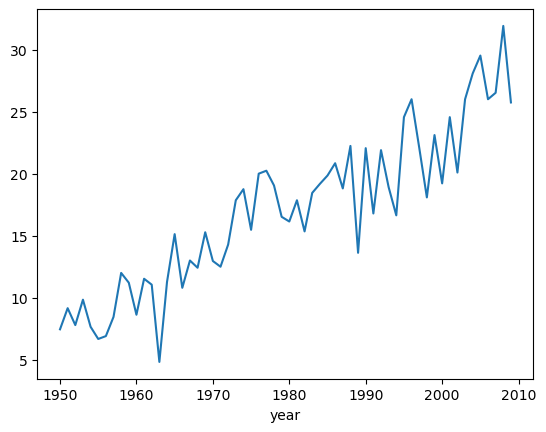

In [31]:
df1_old.groupby('year')['pts'].agg('mean').plot();

In [32]:
df1_new = df1[(df1.year >= 2010) & (df1.year != 2024)]

df(df1_new.groupby('year')['pts'].agg('mean'))

,pts
year,
2010,71.074074
2011,68.535714
2012,80.800000
2013,83.434783
2014,87.826087
2015,91.380952
2016,88.375000
2017,87.826087
2018,106.050000


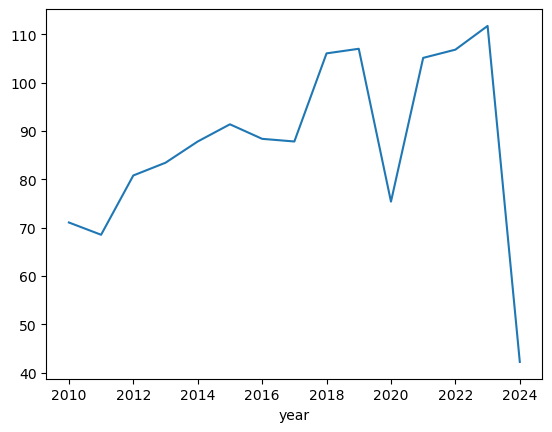

In [34]:
df1_new.groupby('year')['pts'].agg('mean').plot();